In [1]:
import os, json, csv
from collections import namedtuple
import pandas as pd
%matplotlib inline

In [2]:
# listing files in data directory
files_in_data = sorted(os.listdir('data'), reverse = True)
files_in_data

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json']

In [3]:
# paths of files in data
paths = []
for file in files_in_data:
     paths.append(os.path.join('data', file))
sorted(paths, reverse = True)

['data/sample_reviews.json',
 'data/sample_reviews.csv',
 'data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv',
 'data/products.json']

In [4]:
# finding csv files in data
files_with_csv = []
for file in files_in_data:
    if os.path.splitext(file)[1][1:] == 'csv':
        files_with_csv.append(os.path.join('data', file))
sorted(files_with_csv, reverse = True)

['data/sample_reviews.csv',
 'data/review5.csv',
 'data/review4.csv',
 'data/review3.csv',
 'data/review2.csv',
 'data/review1.csv']

In [5]:
# finding all review files in data
review = []
for file in files_in_data:
    if os.path.splitext(file)[0][:6] == 'review':
        review.append(os.path.join('data', file))
sorted(review, reverse = True)

['data/review5.json',
 'data/review5.csv',
 'data/review4.json',
 'data/review4.csv',
 'data/review3.json',
 'data/review3.csv',
 'data/review2.json',
 'data/review2.csv',
 'data/review1.json',
 'data/review1.csv']

In [6]:
# function to read json files by their name and parse out data
def read_json(filename):
    
    file = open(os.path.join("data", filename+".json"), encoding="utf-8")
    json_str = file.read()
    file.close()

    data = json.loads(json_str)
    return data

In [7]:
# read json files by their path and parse data
def read_json_path(path):
    
    file = open(path, encoding="utf-8")
    json_str = file.read()
    file.close()

    data = json.loads(json_str)
    return data

In [8]:
# products we're working with
products = read_json('products')
products

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [9]:
# read csv files and output specified data from reviews
def read_csv(filename, number, category):
    
    f = open(os.path.join('data', filename+'.csv'), encoding='utf-8') # opening csv
    f_reader = csv.reader(f) # read file
    f_data = list(f_reader) # convert data to list
    f.close() # close file
    header = f_data[0] # specify headers
    data = f_data[1:] # specify data
    for review in data: # loop through data
        if review[header.index('review id')] == number: # find review in data with the input review number 
            return review[header.index(category)] # return data of the input category

In [10]:
# review text of review 1410
review_1410 = read_csv('review1', '1410', 'review text')
review_1410

'It does what it is suppose to. No problems with it...'

In [11]:
# review text of review 69899
# checking all files in data for review 69899
for file in files_in_data: 
    if file.split('.')[1] == 'csv':
        if read_csv(file.split('.')[0], '69899', 'review text') != None:
            review_69899 = read_csv(file.split('.')[0], '69899', 'review text')
review_69899

'I hate amazon app store. Nothing good in there. The tablet is too slow for what I do... it is good for reading only....'

In [12]:
# title of review 28013
for file in files_in_data: 
    if file.split('.')[1] == 'csv':
        if read_csv(file.split('.')[0], '28013', 'review title') != None:
            review_28013 = read_csv(file.split('.')[0], '28013', 'review title')
review_28013

'Perfection'

In [13]:
# file of review 28013
for file in files_in_data: 
    if file.split('.')[1] == 'csv':
        f = open(os.path.join("data", file), encoding="utf-8")
        reader = csv.DictReader(f)
        for row in reader:
            if row['review id'] == '28013':
                file_28013 = file
        f.close()
file_28013

'review3.csv'

In [14]:
# data found in sample reviews file
read_json('sample_reviews')

{'10101': ['Mikey123456789', 'B00QFQRELG'],
 '99904': ['diamond', 'B00QFQRELG'],
 '89604': ['Pat91', 'B00QFQRELG'],
 '58704': ['Frank', 'B00QFQRELG'],
 '38104': ['LADYD92', 'B00QFQRELG']}

In [15]:
# creating a named tuple to store individual reviews
Review = namedtuple('Review', ['id', 'username', 'asin', 'title', 'text', 'rating', 'do_recommend', 'num_helpful', 'date'])

In [16]:
# get review data from respective json and csv files
# and combining data from both to output a list of reviews
# formatted in the Review named tuple
def get_reviews(file_json, file_csv):
    reviews = [] # initialize list of reviews
    
    with open(os.path.join("data", file_json), encoding="utf-8") as file: # open json file
        try: # error-handling in case of broken files
            json_str = file.read() # read json file
            data_json = json.loads(json_str) # load json data
            file.close() # close file
        except:
            return None # if file is broken, function skips it
    

    f = open(os.path.join('data', file_csv), encoding='utf-8') # open csv file
    f_reader = csv.reader(f) # read csv
    f_data = list(f_reader) # convert data to list
    f.close() 
    header = f_data[0] # specify header
    data_csv = f_data[1:] # specify data
    
    
    rv = {} # initialize review dict
    for review in data_csv: # loop through data from csv
        try: # error-handling for broken files
            rv['review_id'] = int(review[0]) # set review id as int for review dict
            rv['review_title'] = review[header.index('review title')] # set review title in review dict
            rv['review_text'] = review[header.index('review text')] # set review text in review dict
            rv['review_rating'] = int(review[header.index('review rating')]) # set review rating as int in review dict
            if review[header.index('review do_recommend')] == 'True': # setting and converting recommendations to boolean values
                rv['review_recommend'] = True
            elif review[header.index('review do_recommend')] == 'False':
                rv['review_recommend'] = False
            rv['review_helpful'] = int(review[header.index('review num_helpful')]) # set number helpful as int
            rv['review_date'] = review[header.index('review date')] # set review date in review dict
            for i in data_json: # loop through data from json
                if int(i) == rv['review_id']: # find current iteration review in json file
                    rv['uname'] = data_json[i][0] # set username to dict
                    rv['asin'] = data_json[i][1] # set product asin to dict
            review = Review(rv['review_id'], # organize dict into review named tuple
                        rv['uname'], 
                        rv['asin'], 
                        rv['review_title'], 
                        rv['review_text'], 
                        rv['review_rating'], 
                        rv['review_recommend'], 
                        rv['review_helpful'], 
                        rv['review_date'])
            reviews.append(review) # append current iteration review to list
        except:
            continue # if review is broken, skip it
    return reviews # return list of reviews from review files

In [17]:
# reviews in sample reviews
get_reviews('sample_reviews.json', 'sample_reviews.csv')

[Review(id=10101, username='Mikey123456789', asin='B00QFQRELG', title='A charger', text='It seems to work just like any other usb plug in charger.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-02'),
 Review(id=99904, username='diamond', asin='B00QFQRELG', title='amazon power fast usb charger', text='got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire', rating=5, do_recommend=True, num_helpful=2, date='2016-06-03'),
 Review(id=89604, username='Pat91', asin='B00QFQRELG', title='Amazon powerfast wall charger', text='Best kindle charger ever. Took 30 minutes to being my kindle back to life.', rating=5, do_recommend=True, num_helpful=0, date='2016-11-21'),
 Review(id=58704, username='Frank', asin='B00QFQRELG', title='correct plug for kindle', text='Quickly charges kindle so son can use it. Worked great right out of the package', rating=5, do_recommend=True, num_helpful=0, date='2016-10-14'),


In [18]:
# first ten reviews in review 1
get_reviews('review1.json', 'review1.csv')[:10]

[Review(id=10101, username='Mikey123456789', asin='B00QFQRELG', title='A charger', text='It seems to work just like any other usb plug in charger.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-02'),
 Review(id=99904, username='diamond', asin='B00QFQRELG', title='amazon power fast usb charger', text='got this for my kindle 7 tablet . Does an excellent job charging the kindle fire 7 a lot faster than the one it came with the kindle fire', rating=5, do_recommend=True, num_helpful=2, date='2016-06-03'),
 Review(id=89604, username='Pat91', asin='B00QFQRELG', title='Amazon powerfast wall charger', text='Best kindle charger ever. Took 30 minutes to being my kindle back to life.', rating=5, do_recommend=True, num_helpful=0, date='2016-11-21'),
 Review(id=58704, username='Frank', asin='B00QFQRELG', title='correct plug for kindle', text='Quickly charges kindle so son can use it. Worked great right out of the package', rating=5, do_recommend=True, num_helpful=0, date='2016-10-14'),


In [19]:
# last ten reviews in review 2
get_reviews('review2.json', 'review2.csv')[-10:]

[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [20]:
# data from review 84713
sample_reviews = get_reviews('review2.json', 'review2.csv')
for i in sample_reviews:
    if i.id == 84713:
        review_84713 = i
review_84713

Review(id=84713, username='mmolly1', asin='B01AHB9CN2', title='Great product', text='This product is very user friendly and it is very lightweight', rating=5, do_recommend=True, num_helpful=0, date='2017-01-08')

In [21]:
# data from review 42931
sample_reviews = get_reviews('review1.json', 'review1.csv')
for i in sample_reviews:
    if i.id == 42931:
        review_42931 = i
review_42931

Review(id=42931, username='tbistone', asin='B01BH83OOM', title='Amazing', text='I literally use this thing every single day. Love it.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-20')

In [22]:
# first ten reviews in entire dataset in order of id number
def review_id(review): # function used to sort by reivew id
    return review.id

filenames = [] # initialize filenames list
for file in files_in_data: # loop through files in data
    if os.path.splitext(file)[1][1:] == 'csv': # find csv files
        filenames.append(os.path.splitext(file)[0]) # names of csv files
sorted(filenames, reverse = True) # sorted in reverse order

total_reviews = [] # intialize complete review data
for file in filenames: # loop through file names
    reviews = get_reviews(file+'.json', file+'.csv') # get reviews from each review file
    try:
        for review in reviews:
            total_reviews.append(review)
    except:
        continue
        
first_ten = sorted(total_reviews, key = review_id)[:10]
first_ten

[Review(id=74, username='Wayne', asin='B01AHB9CN2', title='Kindle upgrade', text='Gave this to my wife for Christmas. Upgraded from the original Kindle. She thoroughly enjoys it.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-31'),
 Review(id=82, username='KKLORRAINE', asin='B01AHB9CN2', title='Good', text='Great for reading and Netflix. Fits nice in purse. Good price.', rating=4, do_recommend=True, num_helpful=0, date='2017-04-07'),
 Review(id=110, username='nell', asin='B00IOY8XWQ', title='I love it', text='Prefect for all reading conditions and environments. I take it everywhere.', rating=5, do_recommend=True, num_helpful=0, date='2016-07-09'),
 Review(id=122, username='apple21man', asin='B01BH83OOM', title='A great assistant', text='It works well it takes time for it to know your vocabulary', rating=5, do_recommend=True, num_helpful=0, date='2017-01-23'),
 Review(id=247, username='rockydon1', asin='B018Y229OU', title='great', text='The Kindle fire is a great product. W

In [23]:
# number of reviews for Amazon Tap Smart Assistant Alexa enabled (black) Brand New
for product in products:
    if products[product] == "Amazon Tap Smart Assistant Alexa enabled (black) Brand New":
        asin = product
count = 0
for review in total_reviews:
    if review.asin == asin:
        count += 1
count

165

In [24]:
# number of reviews for All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black
for product in products:
    if products[product] == "All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black":
        asin = product
count = 0
for review in total_reviews:
    if review.asin == asin:
        count += 1
count

12

In [25]:
# finding the product with the most reviews
review_counts = {}
for product in products:
    review_counts[product] = 0
for review in total_reviews:
    for asin in review_counts:
        if asin == review.asin:
            review_counts[asin] += 1
counts = []
for asin in review_counts:
    counts.append(review_counts[asin])
    highest = max(counts)
for asin in review_counts:
    if review_counts[asin] == highest:
        asin = asin
for product in products:
    if product == asin:
        highest_prod = products[product]
highest_prod

'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'

In [26]:
# finding the review(s) with the most number 
# of people that found it helpful for the most reviewed product
def most_helpful(review):
    return review.num_helpful

product_reviews = []
for review in total_reviews:
    if review.asin == asin:
        product_reviews.append(review)
sorted(product_reviews, key=most_helpful, reverse = True)[0]


Review(id=85969, username='Beninkc', asin='B018Y229OU', title='5 star device crippled by amazon', text='This device would be the best possible tablet for the money if it had Google Play. However Amazon chose to block access to it. This took their well made tablet with a beautiful screen and great performance from an amazing value to a waste of money. This is my last amazon branded product.If you use a lot of apps or want specific apps shop for another device.', rating=1, do_recommend=False, num_helpful=20, date='2016-02-14')

In [27]:
# creates a scatter plot of a pandas dataframe
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [28]:
filenames = []
for file in files_in_data:
    if os.path.splitext(file)[1][1:] == 'csv':
        filenames.append(os.path.splitext(file)[0])
sorted(filenames, reverse = True)

reviews = []
for file in filenames:
    if file == 'sample_reviews':
        continue
    r = get_reviews(file+'.json', file+'.csv')
    try:
        for review in r:
            reviews.append(review)
    except:
        continue


In [29]:
# number of unique usernames in review files
total = 0
review_usernames = []
for review in total_reviews:
    if review.username not in review_usernames:
        review_usernames.append(review.username)
len(review_usernames)

3798

In [30]:
# 30 most prolific users in review files
# quantified by the number of reviews by that user
def get_key(item): # used to sort by number of reviews
    return item[1]
prolific_users = []
values = []
users = {}
most_prolific = {}
for user in review_usernames:
    users[user] = []
for user in users:
    for review in reviews:
        if review.username == user:
            users[user].append(review)
for user in users:
    prolific_users.append((user, len(users[user])))
pro_sorted = sorted(prolific_users, key = get_key, reverse = True)[:30]
for user in pro_sorted:
    most_prolific[user[0]] = user[1]
most_prolific

{'Dave': 5,
 'Missy': 4,
 '1234': 4,
 'Steve': 4,
 'Chris': 4,
 'Angie': 4,
 'Mike': 4,
 'Susan': 4,
 'Frank': 3,
 'Manny': 3,
 'Michael': 3,
 'Susie': 3,
 'Bill': 3,
 'Charles': 3,
 'Dani': 3,
 'mike': 3,
 'Rick': 3,
 'Kindle': 3,
 'Mimi': 3,
 'Jojo': 3,
 'Charlie': 3,
 'Anonymous': 3,
 'kcladyz': 3,
 'David': 3,
 'Josh': 3,
 'Pete': 3,
 'John': 3,
 'Richard': 3,
 'Bubba': 3,
 'Grandma': 3}

In [31]:
# users whose reviews have been found helpful at least 
most_helpful = {}
for review in reviews:
    if review.num_helpful >= 5:
        if review.username not in most_helpful:
            most_helpful[review.username] = 0
        most_helpful[review.username] += review.num_helpful
most_helpful

{'Beninkc': 20,
 'Roberto002007': 7,
 'Dick': 5,
 'CarlosEA': 10,
 'EricO': 7,
 'Junior': 7,
 'TerrieT': 5,
 'LadyEsco702': 8,
 'safissad': 8,
 'Quasimodo': 5,
 'iMax': 5,
 'mysixpack': 6,
 'Deejay': 8,
 'stephfasc22': 5,
 'AshT': 5,
 'fenton': 6,
 'Rodge': 6,
 'Ellen': 10,
 'Karch': 5,
 'FrankW': 5,
 'Kime': 5,
 'Mark': 5,
 '1Briansapp': 5,
 'trouble': 5,
 'Stuartc': 8,
 'Earthdog': 27}

In [32]:
# returns average rating of a product
def avg_rating(asin):
    rating = 0
    count = 0
    r = []
    for review in reviews:
        if review.asin == str(asin):
            if review not in r:
                r.append(review)
    for review in r:
        rating += review.rating
        count = len(r)
    avg_rating = rating/count
    return avg_rating

In [33]:
# find average rating of each product
product_averages = {}
for product in products:
    product_averages[products[product]] = avg_rating(product)
product_averages

{'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New': 4.6909090909090905,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping': 5.0,
 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers': 4.666666666666667,
 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish': 5.0,
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case': 4.603448275862069,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black': 4.583333333333333,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,


In [34]:
# mapping asin to average rating
asin_averages = {}
for product in products:
    asin_averages[product] = avg_rating(product)
asin_averages

{'B00QFQRELG': 4.7272727272727275,
 'B01BH83OOM': 4.6909090909090905,
 'B00ZV9PXP2': 4.590163934426229,
 'B0751RGYJV': 5.0,
 'B00IOY8XWQ': 4.666666666666667,
 'B0752151W6': 5.0,
 'B018Y226XO': 4.603448275862069,
 'B01ACEKAJY': 4.583333333333333,
 'B01AHB9CYG': 4.574468085106383,
 'B01AHB9CN2': 4.6,
 'B00VINDBJK': 4.866666666666666,
 'B01AHB9C1E': 3.8333333333333335,
 'B018Y229OU': 4.490408673894913}

In [35]:
# returns the number of reviews for a product
def get_num_reviews(asin):
    rev = []
    for review in reviews:
        if review.asin == str(asin):
            if review not in rev:
                rev.append(review)
    for review in rev:
        number = len(rev)
    
    return number

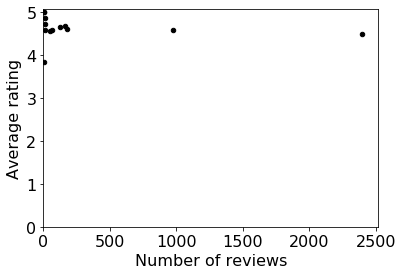

In [36]:
# relation between average rating and number of reviews
averages = []
for asin in asin_averages:
    averages.append(asin_averages[asin])
counts = []
for asin in asin_averages:
    counts.append(get_num_reviews(asin))
counts
scatter(counts, averages, xlabel = 'Number of reviews', ylabel = 'Average rating')

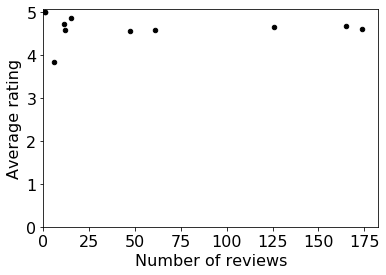

In [37]:
# removing outliers from products
adjusted_averages = []
adjusted_counts = []
for asin in asin_averages:
    if get_num_reviews(asin) < 800:
        adjusted_averages.append(asin_averages[asin])
        adjusted_counts.append(get_num_reviews(asin))
scatter(adjusted_counts, adjusted_averages, xlabel = 'Number of reviews', ylabel = 'Average rating')

In [38]:
review_values = {}
for review in reviews: # creating dict to map each rating to reviews of that rating
    if review.rating not in review_values:
        review_values[review.rating] = []
    review_values[review.rating].append(review)
review_values

def average_text(values): # returns the average length of review text for reviews in each rating
    
    averages = {}
    for rating in values:
        count = 0
        total = 0
        for review in values[rating]:
            if review.rating == rating:
                total += len(review.text)
                count += 1
                avg = total/count
            averages[rating] = avg
    return averages

In [39]:
# creating list of ratings and average text for scatter plot
rating_avgtext = average_text(review_values)
ratings = []
avg_text = []
for rating in rating_avgtext:
    ratings.append(rating)
    avg_text.append(rating_avgtext[rating])


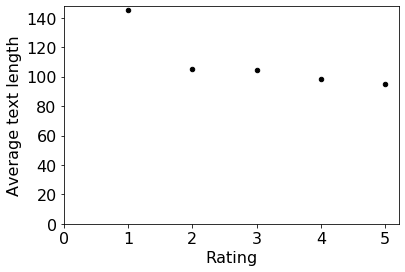

In [40]:
# relationship between average rating and length of review text
scatter(ratings, avg_text, xlabel = 'Rating', ylabel='Average text length')

In [41]:
# finding the percentage of reviews that were found helpful
def percent_help(values):
    
    percents = {}
    for rating in values:
        count = 0
        total = 0
        for review in values[rating]:
            if review.rating == rating:
                if review.num_helpful >= 1:
                    total += 1
                count += 1
                percent = total/count
            percents[rating] = percent
    return percents

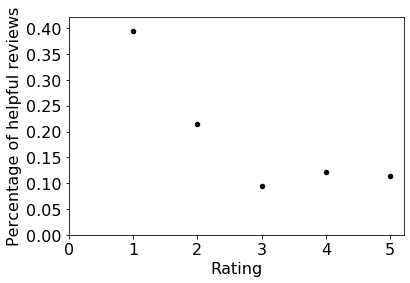

In [42]:
# relationship between rating and likelihood of review being found helpful
rating_prchelp = percent_help(review_values)
prc = []
for rating in rating_prchelp:
    prc.append(rating_prchelp[rating])
scatter(ratings, prc, xlabel = 'Rating', ylabel='Percentage of helpful reviews')

In [43]:
# average rating of all reviews that recommend their products
total = 0
count = 0
for review in reviews:
    if review.do_recommend == True:
        total += review.rating
        count += 1
avg = total/count
avg

4.607549120992761

In [44]:
# finding the percentage that recommended the product by rating
def recommend(values):
    
    do_recommend = {}
    for rating in values:
        count = 0
        total = 0
        for review in values[rating]:
            if review.rating == rating:
                if review.do_recommend == True:
                    total += 1
                count += 1
                percent = total/count
            do_recommend[rating] = percent
    return do_recommend

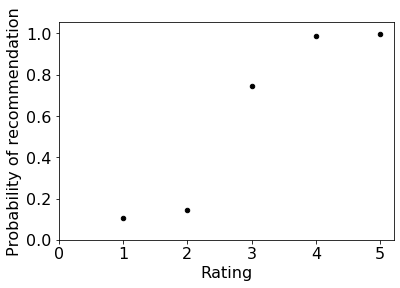

In [45]:
# relationship between rating and likelihood of the product being recommended
rating_recommend = recommend(review_values)
rec = []
for rating in rating_recommend:
    rec.append(rating_recommend[rating])
scatter(ratings, rec, xlabel = 'Rating', ylabel='Probability of recommendation')

In [46]:
# most common words in reviews with a rating of 5 that occur more that 1000 times
words_in_rating = {}
for rating in review_values:
    if rating == 5: # finding reviews with 5 rating
        for review in review_values[rating]: # looping through reviews of rating 5
            txt = review.text
            words = txt.lower().split(" ") # splitting words into lists
            for word in words: # loop through words
                if word not in words_in_rating: # if word hasn't been seen, make it a key with value 0
                    words_in_rating[word] = 0
                words_in_rating[word] += 1 # add one for each repeated word seen
over_thou = {} # creating dict only with words appearing more than 1000 times
for word in words_in_rating:
    if words_in_rating[word] > 1000:
        over_thou[word] = words_in_rating[word]
over_thou

{'i': 1317,
 'for': 1800,
 'my': 1146,
 'to': 1442,
 'it': 1286,
 'this': 1016,
 'the': 1740,
 'a': 1134,
 'and': 1818}

In [47]:
# words that appear in the title of 5 ratings
words_in_title = {}
for rating in review_values:
    if rating == 5:
        for review in review_values[rating]:
            title = review.title
            words = title.lower().split(" ")
            for word in words: 
                if word not in words_in_title:
                    words_in_title[word] = 0
                words_in_title[word] += 1
over_hun = {} # only looking at words that appear more than 100 times
for word in words_in_title:
    if words_in_title[word] >= 100:
        over_hun[word] = words_in_title[word]
over_hun

{'great': 1093,
 'tablet': 681,
 'fire': 104,
 'for': 617,
 'the': 231,
 'my': 138,
 'kindle': 142,
 'to': 106,
 'good': 212,
 'price': 149,
 'gift': 105,
 'it': 137,
 'a': 143,
 'love': 158,
 'kids': 132,
 'awesome': 108,
 'product': 179}

In [48]:
# words that appear in the title of 1 ratings
words_in_title_one = {}
for rating in review_values:
    if rating == 1:
        for review in review_values[rating]:
            title = review.title
            words = title.lower().split(" ")
            for word in words: 
                if word not in words_in_title_one:
                    words_in_title_one[word] = 0
                words_in_title_one[word] += 1
over_one = {} #occur more than once
for word in words_in_title_one:
    if words_in_title_one[word] > 1:
        over_one[word] = words_in_title_one[word]
over_one

{'not': 8,
 'very': 3,
 'disappointed': 2,
 'poor': 2,
 'does': 2,
 'amazon': 5,
 'a': 5,
 'great': 2,
 '5': 2,
 'work': 2,
 'to': 2,
 'use': 2,
 'and': 2,
 'kindle': 2,
 'tablet': 4,
 'for': 2,
 'good': 2,
 'really': 2,
 'with': 2}

In [49]:
# words that appear in the title of 3 ratings
words_in_title_three = {}
for rating in review_values:
    if rating == 3:
        for review in review_values[rating]:
            title = review.title
            words = title.lower().split(" ")
            for word in words: 
                if word not in words_in_title_three:
                    words_in_title_three[word] = 0
                words_in_title_three[word] += 1
over_three = {} # occur more than 10 times
for word in words_in_title_three:
    if words_in_title_three[word] > 10:
        over_three[word] = words_in_title_three[word]
over_three

{'tablet': 51,
 'the': 18,
 'great': 37,
 'good': 42,
 'for': 60,
 'price': 18,
 'ok': 18,
 'a': 17,
 'not': 13}

In [50]:
#path to the helpful directory
helpful_path = os.path.join('broken_file', 'rating5','helpful')

In [51]:
# takes a path and looks recursively at anything contained in that directory
def explore_directory(path):
    paths = [] # list of paths in path
    if os.path.isfile(path) == True:
        paths.append(path) # if it's a file add to paths
    else: # otherwise, explore that directory
        for i in os.listdir(path):
            if i[0] == '.': # skip any files beginning with '.'
                continue
            paths += explore_directory(os.path.join(path, i)) # begin sequence again with new path
    return paths

In [52]:
# listing paths in the helpful directory
explore_directory(helpful_path)

['broken_file/rating5/helpful/helpful.json']

In [53]:
# listing paths in the rating4 directory of broken file
rating4_path = os.path.join('broken_file', 'rating4')
sorted(explore_directory(rating4_path), reverse = True)

['broken_file/rating4/very_helpful/very_helpful.json',
 'broken_file/rating4/others/short/short.json',
 'broken_file/rating4/others/others/others.json',
 'broken_file/rating4/not_helpful.json']

In [54]:
# paths of all files in broken file
broken_files = sorted(explore_directory(os.path.join('broken_file')), reverse = True)
broken_files

['broken_file/rating5/others.json',
 'broken_file/rating5/helpful/helpful.json',
 'broken_file/rating4/very_helpful/very_helpful.json',
 'broken_file/rating4/others/short/short.json',
 'broken_file/rating4/others/others/others.json',
 'broken_file/rating4/not_helpful.json',
 'broken_file/rating3/others/others.json',
 'broken_file/rating3/long/long.json',
 'broken_file/others.json']

In [55]:
# combine files in broken file and find number of unique products
products_in_broken = []
for file in broken_files:
    broken_reviews = read_json_path(file)
    for review in broken_reviews:
        if broken_reviews[review][1] not in products_in_broken:
            products_in_broken.append(broken_reviews[review][1])
len(products_in_broken)

1

In [56]:
# writing json file
def write_json(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file)

In [57]:
# combining files in broken file and data directories to get the complete review data
try:
    review4 = len(get_reviews('broken_file.json', 'review4.csv'))
    review1 = len(get_reviews('review1.json', 'review1.csv'))
    review2 = len(get_reviews('review2.json', 'review2.csv'))
    review3 = len(get_reviews('review3.json', 'review3.csv'))
    review5 = len(get_reviews('review5.json', 'review5.csv'))
    total_num_reviews = review1 + review2 + review3 + review4 + review5

except:
    full_data = {}
    broken_file_data = []
    for file in broken_files:
        broken_file_data.append(read_json_path(file))
    broken_file_data
    for review in broken_file_data:
        for num in review:
            full_data[num] = review[num]
    write_json(full_data, os.path.join('data', 'broken_file.json'))
    
    review4 = len(get_reviews('broken_file.json', 'review4.csv'))
    review1 = len(get_reviews('review1.json', 'review1.csv'))
    review2 = len(get_reviews('review2.json', 'review2.csv'))
    review3 = len(get_reviews('review3.json', 'review3.csv'))
    review5 = len(get_reviews('review5.json', 'review5.csv'))
    total_num_reviews = review1 + review2 + review3 + review4 + review5

os.remove(os.path.join('data', 'broken_file.json'))
total_num_reviews # total number of reviews found in review data

4992

In [59]:
# change in average rating caused by the addition of the new data 
# for Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta
prod_count = 0
prod_rating = 0
for review in comp_reviews:
    if review.asin == 'B018Y229OU':
        prod_count += 1
        prod_rating += review.rating
        avg_rating = prod_rating/prod_count
avg_rating
for asin in asin_averages:
    if asin == 'B018Y229OU':
        change = avg_rating - asin_averages[asin]
        pct_change = (change/asin_averages[asin]) * 100
pct_change

0.31190229022053717